### Exploratory Data Analysis PPG & Glucose Dataset

This notebook performs EDA on the **PPG_Dataset.zip**, which contains photoplethysmography (PPG) signals along with actual blood glucose levels and patient demographics.

In [39]:
import zipfile
import os
import pyunpack

import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATA 

In [40]:
rar_path = "data/raw/PPG_Dataset.rar"
extract_path = "data/raw/ppg_extracted"

# Ensure the required module is installed
try:
    from pyunpack import Archive
except ImportError:
    raise ImportError("pyunpack module not found. Install it using 'pip install pyunpack patool'.")

if not os.path.exists(extract_path):
    os.makedirs(extract_path, exist_ok=True)
    Archive(rar_path).extractall(extract_path)
    print("Dataset extracted successfully!")
else:
    print("Dataset already extracted.")

Dataset already extracted.


In [41]:
# Define data paths
raw_data_path = os.path.join(extract_path, "RawData")
labels_path = os.path.join(extract_path, "Labels")

# List files
raw_mat_files = sorted([f for f in os.listdir(raw_data_path) if f.endswith(".mat")])
raw_csv_files = sorted([f for f in os.listdir(raw_data_path) if f.endswith(".csv")])
label_mat_files = sorted([f for f in os.listdir(labels_path) if f.endswith(".mat")])
label_csv_files = sorted([f for f in os.listdir(labels_path) if f.endswith(".csv")])

# Load an example PPG signal
example_raw_file = os.path.join(raw_data_path, raw_mat_files[0])
raw_data = scipy.io.loadmat(example_raw_file)
ppg_signal = raw_data['signal'].flatten()

# Load all label data into a DataFrame
label_data_list = []
for f in label_csv_files:
    label_file_path = os.path.join(labels_path, f)
    df = pd.read_csv(label_file_path)
    label_data_list.append(df)

# Combine all label files into one DataFrame
labels_df = pd.concat(label_data_list, ignore_index=True)

# Display the DataFrame
import ace_tools as tools

tools.display_dataframe_to_user(name="Labels Data", dataframe=labels_df)

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/ppg_extracted/RawData'

In [19]:
print("Dataset Shape:", len(raw_files), "PPG signals and", len(label_files), "label files")
print("Sample PPG Signal Length:", len(ppg_signal))




print("\nParticipant Information:")
print(f"Participant ID: {participant_info['Participant ID']}")
print(f"Gender: {participant_info['Gender']}")
print(f"Age: {participant_info['Age']} years")
print(f"Blood Glucose Level: {participant_info['Blood Glucose Level (mg/dL)']} mg/dL")
print(f"Height: {participant_info['Height (cm)']} cm")
print(f"Weight: {participant_info['Weight (kg)']} kg")

Dataset Shape: 67 PPG signals and 68 label files
Sample PPG Signal Length: 21900

Participant Information:
Participant ID: b'T'
Gender: b'MCOS'
Age: b'table' years
Blood Glucose Level: [[3707764736]
 [         2]
 [         1]
 [         1]
 [         1]
 [         1]] mg/dL
Height: None cm
Weight: None kg


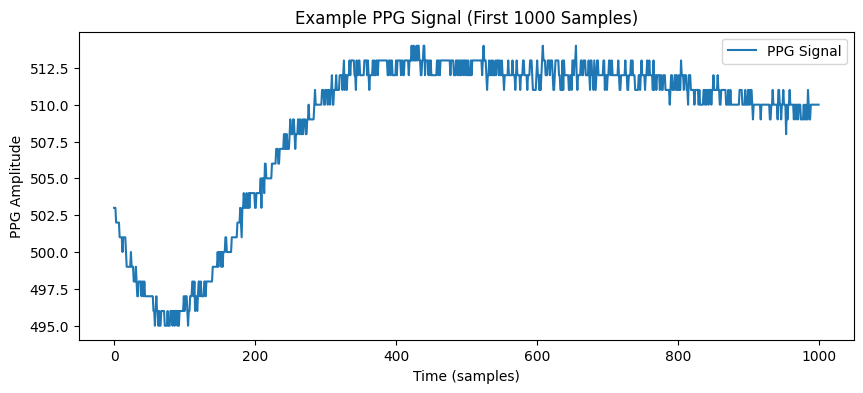

In [21]:
plt.figure(figsize=(10,4))
plt.plot(ppg_signal[:1000], label="PPG Signal")
plt.title("Example PPG Signal (First 1000 Samples)")
plt.xlabel("Time (samples)")
plt.ylabel("PPG Amplitude")
plt.legend()
plt.show()

In [33]:

# Load all label data into a DataFrame
label_data_list = []
for f in label_files:
    label_file_path = os.path.join(labels_path, f)
    label_data = scipy.io.loadmat(label_file_path)
    label_key = next((key for key in label_data.keys() if not key.startswith('__')), None)
    if label_key and label_key in label_data:
        label_info = label_data[label_key].squeeze()
        if isinstance(label_info, np.ndarray) and label_info.shape and label_info.size >= 6:
            label_data_list.append({
                "Participant ID": label_info[0],
                "Gender": label_info[1],
                "Age": label_info[2],
                "Blood Glucose Level (mg/dL)": label_info[3],
                "Height (cm)": label_info[4],
                "Weight (kg)": label_info[5]
            })

# Convert to DataFrame
labels_df = pd.DataFrame(label_data_list)
print("Label data")
labels_df.head()


Label data


""


In [27]:
blood_glucose_values = []
for f in label_files:
    label_data = scipy.io.loadmat(os.path.join(labels_path, f))
    if label_key in label_data:
        label_info = label_data[label_key].squeeze()
        if isinstance(label_info, np.ndarray) and label_info.shape and label_info.size >= 4:
            blood_glucose_values.append(label_info[3])

print("\nBlood Glucose Levels:")
print(blood_glucose_values)


Blood Glucose Levels:
[]


In [26]:
# Blood glucose histogram
blood_glucose_values = []
participant_ids = []
for f in label_files:
    label_data = scipy.io.loadmat(os.path.join(labels_path, f))
    if label_key in label_data:
        label_info = label_data[label_key].squeeze()
        if isinstance(label_info, np.ndarray) and label_info.shape and label_info.size >= 4:
            blood_glucose_values.append(label_info[3])
            participant_ids.append(label_info[0])  # Using participant ID as x-axis

if blood_glucose_values:
    plt.figure(figsize=(8,4))
    plt.scatter(participant_ids, blood_glucose_values, color='blue', alpha=0.6)
    plt.title("Blood Glucose Levels by Participant")
    plt.xlabel("Participant ID")
    plt.ylabel("Blood Glucose Level (mg/dL)")
    plt.show()
else:
    print("No valid blood glucose values found for visualization.")

No valid blood glucose values found for visualization.
